In [18]:
from __future__ import division

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tqdm\import scipy as sp

import xgboost as xgb

%matplotlib inline

In [ ]:
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [41]:
dtrain = xgb.DMatrix('01 train')
dtest = xgb.DMatrix('01 test')
target = np.loadtxt('target.csv')
ids = np.loadtxt('ids.csv').astype(int)

In [54]:
bst = xgb.train({}, dtrain)
# make prediction
preds  = np.clip(bst.predict(dtest),  0, 1)
preds2 = np.clip(bst.predict(dtrain), 0, 1)

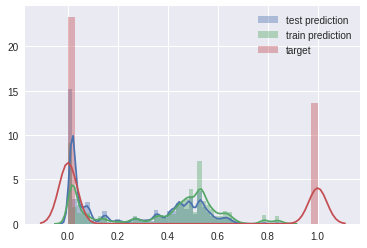

In [55]:
sns.distplot(preds, label = 'test prediction')
sns.distplot(preds2, label = 'train prediction')
sns.distplot(target, label = 'target')
plt.legend()

In [56]:
submission       = pd.DataFrame.from_items([('test_id', ids), ('is_duplicate', preds)])
submission_zeros = pd.DataFrame.from_items([('test_id', ids), ('is_duplicate', np.zeros(len(ids)))])
submission_ones  = pd.DataFrame.from_items([('test_id', ids), ('is_duplicate', np.ones(len(ids)))])

In [57]:
submission.to_csv('00 submission xgb.csv', index = False)
submission_zeros.to_csv('01 submission zeros.csv', index = False)
submission_ones.to_csv('02 submission ones.csv', index = False)